# **Data Clensing**

---

*   Import Dataset
*   Replace NULL values
*   Drop unwanted values




In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset from Kaggle 
# https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

df = pd.read_csv('/content/melb_data.csv')

# Identify the NULL columns
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

# Fill the Null values with the Mode of the column
for column in null_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


# Convert datatypes to required type
df['Bedroom2']      = df['Bedroom2'].astype(int)
df['Propertycount'] = df['Propertycount'].astype(int)
df['YearBuilt']     = df['YearBuilt'].astype(int)
df['Price']         = df['Price'].astype(int)
df['Postcode']      = df['Postcode'].astype(int)

# Extract Yearmonth from Date
df['month'] = pd.DatetimeIndex(df['Date']).month.astype(str)
df['yr_sold'] = pd.DatetimeIndex(df['Date']).year.astype(str)

# Create a derived column
df['yr_month_sold'] = df['yr_sold'] + df['month']

# Drop unwanted columns
df = df.drop(columns=['Address', 'Type', 'Lattitude', 'Longtitude', 'Car', 'Date', 'month', 'yr_sold'])

df.head()


,Suburb,Rooms,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,yr_month_sold
0,Abbotsford,2,1480000,S,Biggin,2.5,3067,2,1.0,202.0,120.0,1970,Yarra,Northern Metropolitan,4019,20163
1,Abbotsford,2,1035000,S,Biggin,2.5,3067,2,1.0,156.0,79.0,1900,Yarra,Northern Metropolitan,4019,20164
2,Abbotsford,3,1465000,SP,Biggin,2.5,3067,3,2.0,134.0,150.0,1900,Yarra,Northern Metropolitan,4019,20174
3,Abbotsford,3,850000,PI,Biggin,2.5,3067,3,2.0,94.0,120.0,1970,Yarra,Northern Metropolitan,4019,20174
4,Abbotsford,4,1600000,VB,Nelson,2.5,3067,3,1.0,120.0,142.0,2014,Yarra,Northern Metropolitan,4019,20164


# **Finding Coorelation**

**Seaborn**

*   Pairplot
*   Heatmap


## Pairplot

In [5]:
#sns.pairplot(dfX)

## Heatmap

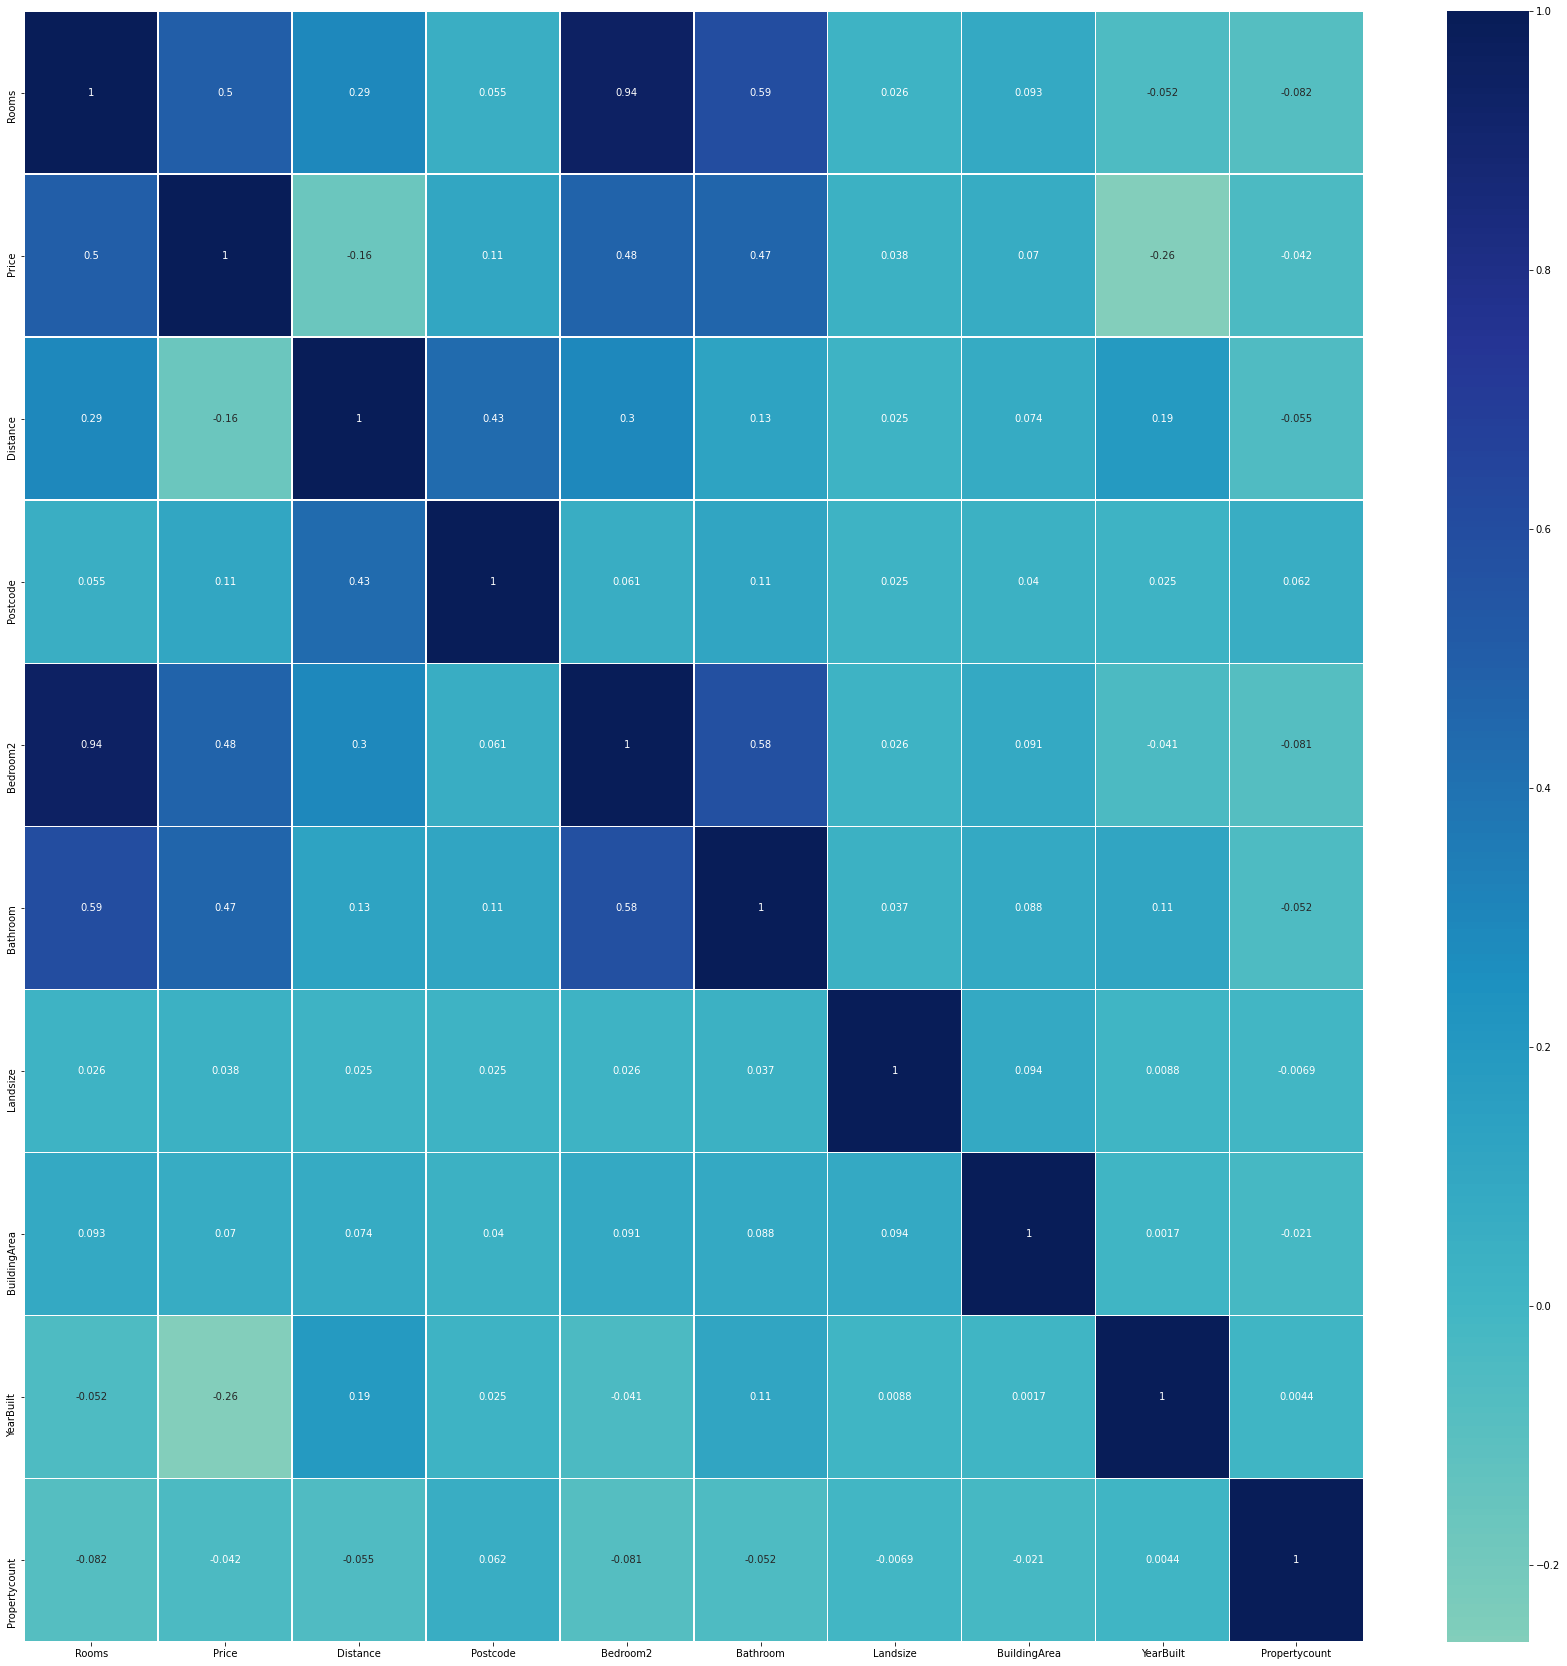

In [6]:
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize = (30, 30))

g = sns.heatmap(df[top_corr_features].corr(), annot=True, center=0, linewidths=.5, cmap="YlGnBu")

## Dropping unwanted columns again

In [7]:
# Creating two Dataframes; dfX = Independent Features; dfy = Dependent features
# df = df.drop(columns=['yr_month_sold', 'Suburb', 'Method', 'SellerG', 'CouncilArea', 'Regionname'])

dfX = df.drop(columns=['Price'])
dfy = pd.DataFrame(data=df['Price'])

dfX.head()
dfy.head()


,Price
0,1480000
1,1035000
2,1465000
3,850000
4,1600000


# **Replace categorical features with dummy variables**

---

**Obtain a list of Categorical features**

We do this by checking the data type (or dtype) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables



In [8]:
s = (dfX.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorical Variables:')
print(object_cols)

# One Hot Encoding
dfX = pd.get_dummies(dfX, drop_first=True)

dfX.head()

X = dfX.iloc[:,:]
y = dfy.iloc[:,:]



Categorical Variables:
['Suburb', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'yr_month_sold']


# **Identify Important Features**

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X.values, y.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [10]:
print(model.feature_importances_)

[1.88359999e-01 6.12701451e-02 1.15459063e-02 4.88122182e-02
 8.75979859e-02 5.81286376e-02 3.59744815e-02 4.05720943e-02
 7.52914588e-03 1.13666282e-03 6.78014730e-05 2.96222481e-06
 3.80554405e-03 3.77653472e-05 7.05123721e-04 2.00198391e-04
 4.28723248e-06 4.44818561e-05 3.19290532e-07 2.89194667e-03
 1.35812874e-04 5.13277640e-04 8.29232324e-05 3.05431005e-05
 7.31626219e-06 9.41340593e-08 1.53594936e-04 1.27098497e-07
 2.72677922e-05 1.32763554e-03 1.79875506e-03 3.76568779e-06
 4.04576389e-06 2.63616313e-07 2.91866267e-07 2.18850101e-04
 2.46466867e-05 1.67911035e-04 9.98314096e-04 1.30810086e-05
 1.23787602e-04 2.79291316e-04 2.66388705e-05 2.31519704e-05
 1.24308128e-04 6.63348942e-05 9.45598108e-04 4.96043789e-05
 7.66200739e-06 8.57788760e-03 4.80473605e-04 5.93632454e-05
 4.33771677e-07 1.01168722e-05 3.51315644e-04 1.75902564e-04
 2.04614343e-04 1.86130744e-04 1.67733371e-07 3.32656037e-05
 3.59221547e-05 1.41589095e-07 3.03545355e-07 5.06437704e-04
 2.82505854e-05 3.334087

**Plot graph of feature importance**


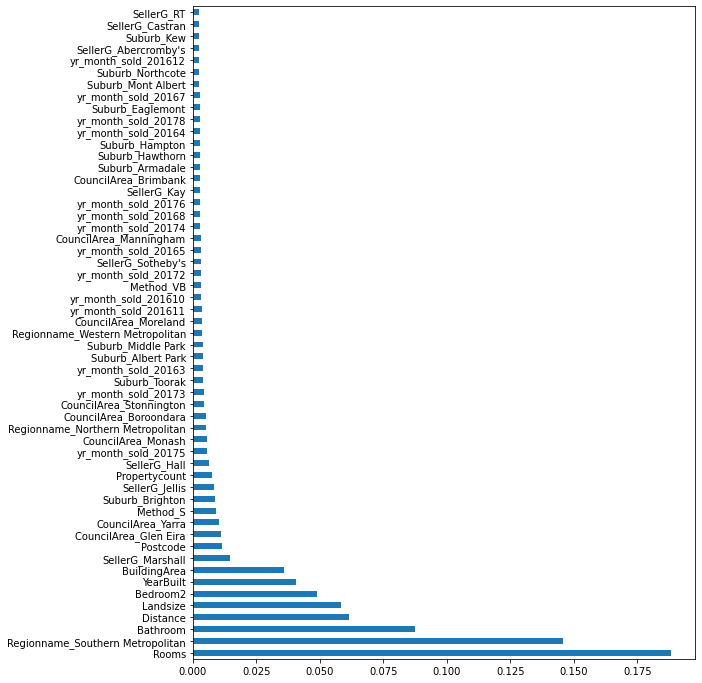

In [11]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
plt.figure(figsize=(9, 12))
feat_importances.nlargest(55).plot(kind='barh')
plt.show()

# **Splitting the Data into Training and Test set**


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

# **Model Selection**

---

**Try multiple regression models to find one best fit model.**

> DecisionTree Regressor

> Random Forest

> XGBoost



In [13]:
# Training DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
mdl_decision_tree_reg = DecisionTreeRegressor()
mdl_decision_tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
# Training RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters to identify best fit value for RandomForest
hyper_params = {
    'n_estimators' : [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5, 10, 15, 20, 25, 30],
    'min_samples_split' : [5, 15, 25, 50],
    'min_samples_leaf' : [1, 2, 5, 10]
}

# mdl_select = RandomizedSearchCV(estimator=mdl_rf, param_distributions=hyper_params, scoring='neg_mean_squared_error', cv=5, verbose=2)
# mdl_select.fit(X_train, y_train)


# Use the hyperparameters based on the result after running the above 2 statements
mdl_random_forest_reg = RandomForestRegressor(max_depth=25, max_features='auto', min_samples_leaf=10, min_samples_split=25, n_estimators=100)
mdl_random_forest_reg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=25, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
# Training XGBoost Regressor
from xgboost import XGBRegressor

mdl_xgboost = XGBRegressor(n_estimators=500, learning_rate=0.05)
mdl_xgboost.fit(X_train, y_train)

# Huma readable description of a model
# model.dump_model('dump.raw.txt')

[16:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# **Model Prediction & Evaluation**

---

**In this section we will measure each model for-**

*   R-Squared
*   MAE (Mean Absolute Error)


In [16]:
# DecisionTree Model Eval

# Prediction
y_pred = mdl_decision_tree_reg.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("r2_score", r2_score(y_test,y_pred) * 100)

r2_score 60.52282052814497


In [17]:
# RandomForest Model Eval

# Prediction
y_pred = mdl_random_forest_reg.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score
print("r2_score", r2_score(y_test,y_pred) * 100)


r2_score 74.66442039092355


In [18]:
# XGBoost Model Eval

# Prediction
y_pred = mdl_xgboost.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score
print("r2_score", r2_score(y_test,y_pred) * 100)

r2_score 77.59529333086728


# **Export Model to Pickle File**

In [19]:
import pickle
file = open('mdl_xgboost.pkl', 'wb')

# Uncomment the below line and replace 'my_model' w/ your model variable and run the block.
pickle.dump(mdl_xgboost, file)